# Keras - Classifying MNIST dataset with CNN

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23 percent. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8 percent.An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits.

THE MNIST DATABASE of handwritten digits - http://yann.lecun.com/exdb/mnist/

### Loading the MNIST dataset

In [12]:
from tensorflow import keras
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape)
print ("x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape)

x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Plotting digits

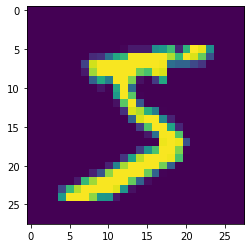

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0]) #plots the first digit stored in the training dataset

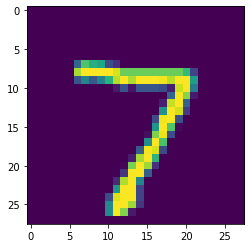

In [16]:
plt.imshow(x_test[0]) #plots the first digit stored in the testing dataset

### Casting inputs to float32

In [17]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Normalizing the inputs

In [18]:
x_train /= 255
x_test  /= 255

###Reshaping the dataset

Next, we need to reshape our dataset inputs (x_train and x_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for x_train and 10,000 for x_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### Converting labels to one-hot vectors

In [19]:
from keras.utils import np_utils

NB_CLASSES = 10 # (number of classes)
y_train_one_hot = np_utils.to_categorical(y_train, NB_CLASSES) 
y_test_one_hot  = np_utils.to_categorical(y_test, NB_CLASSES)
print ("Dimension of y_train_one_hot = ", y_train_one_hot.shape)
print ("Dimension of y_test_one_hot  = ", y_test_one_hot.shape)
print (y_train[0], "=>", y_train_one_hot[0])
print (y_test[0],  "=>", y_test_one_hot[0])

Dimension of y_train_one_hot =  (60000, 10)
Dimension of y_test_one_hot  =  (10000, 10)
5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Building the CNN model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras

model = Sequential()
#C1 Convolutional Layer, padding='same' means the input and the output has the
#same length
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), 
                 activation='tanh', input_shape=(28,28, 1), padding='same'))
#S2 Pooling Layer, padding='valid' means no padding
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'))
#C3 Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), 
                 activation='tanh', padding='valid'))
#S4 Pooling Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#C5 Convolutional Layer
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), 
                 activation='tanh', padding='valid'))
#Flatten the CNN output so that it can connect with the next
#fully connected layer
model.add(Flatten())
#F6 Fully Connected Layer
model.add(Dense(units=84, activation='tanh'))
#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 5880)             

### Compiling the model

In [23]:
from keras.optimizers import SGD

OPTIMIZER = SGD(learning_rate=0.1, momentum = 0.8)
model.compile(optimizer=OPTIMIZER, loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

### Fitting the model

In [28]:
from keras.callbacks import EarlyStopping

ES = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1, mode='auto')

model_history = model.fit(x=x_train, y=y_train_one_hot, 
                          epochs=20, batch_size=128, 
                          validation_split = 0.2,
                          verbose=1,
                          callbacks=[ES]
                          )

Epoch 1/20
375/375 [==============================] - 90s 238ms/step - loss: 0.0962 - accuracy: 0.9710 - val_loss: 0.0719 - val_accuracy: 0.9799
Epoch 2/20
375/375 [==============================] - 88s 235ms/step - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.0563 - val_accuracy: 0.9835
Epoch 3/20
375/375 [==============================] - 87s 232ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 4/20
375/375 [==============================] - 87s 233ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0616 - val_accuracy: 0.9832
Epoch 4: early stopping


### Evaluating the model

In [29]:
score = model.evaluate(x_test, y_test_one_hot, verbose=2) 
print('Test accuracy:', score[1])

313/313 - 6s - loss: 0.0469 - accuracy: 0.9856 - 6s/epoch - 20ms/step
Test accuracy: 0.9855999946594238


### Predicting the class

In [30]:
y_probability = model.predict(x_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

313/313 [==============================] - 8s 23ms/step
True class =  7 Predicted class =  7


### Plotting the model performances

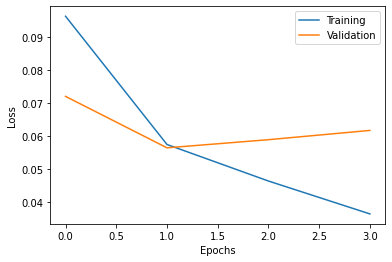

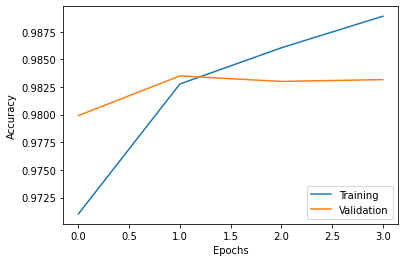

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)

### Saving the whole trained model

In [34]:
model.save('cnn_mnist_model')

###Loading the saved model

In [35]:
saved_model = keras.models.load_model('cnn_mnist_model')

In [38]:
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 5880)             

In [36]:
score = saved_model.evaluate(x_test, y_test_one_hot, verbose=0) 
print('Test accuracy:', score[1])

Test accuracy: 0.9855999946594238


In [37]:
y_probability = saved_model.predict(x_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

313/313 [==============================] - 7s 23ms/step
True class =  7 Predicted class =  7
